<a href="https://colab.research.google.com/github/Hongjieun123/deeplearning-project/blob/master/TensorFlow_MNIST__(false_list_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%BD%91%EC%95%84%EB%82%B4%EA%B8%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab에서 tensorflow 1.x 실행
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from datetime import datetime

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

print('')
print('train num = ', mnist.train.num_examples, ', test num = ', mnist.test.num_examples, ', validation num = ', mnist.validation.num_examples)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
print('type(mnist) = ', type(mnist), ' ,type(mnist.train.images) = ', type(mnist.train.images), ', type(mnist.train.labels) = ', type(mnist.train.labels))

print('\ntrain image shape = ', np.shape(mnist.train.images))
print('train label shape = ', np.shape(mnist.train.labels))
print('test image shape = ', np.shape(mnist.test.images))

print('\ntrain image shape = ', mnist.train.images.shape)
print('test image shape = ', mnist.test.images.shape)
print('validation image shape = ', mnist.validation.images.shape)

type(mnist) =  <class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>  ,type(mnist.train.images) =  <class 'numpy.ndarray'> , type(mnist.train.labels) =  <class 'numpy.ndarray'>

train image shape =  (55000, 784)
train label shape =  (55000, 10)
test image shape =  (10000, 784)

train image shape =  (55000, 784)
test image shape =  (10000, 784)
validation image shape =  (5000, 784)


In [6]:
print('len(mnist.train.images[0]) = ', len(mnist.train.images[0]))
print(mnist.train.images[0])
print('One-Hot Encoding 확인\n')
print('len(mnist.train.labels[0]) = ', len(mnist.train.labels[0]))
print(mnist.train.labels[0])

len(mnist.train.images[0]) =  784
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        

In [0]:
learning_rate = 0.1
epochs = 100
batch_size = 100

input_nodes = 784
hidden_nodes = 10
output_nodes = 10

In [0]:
X = tf.placeholder(tf.float32, [None, input_nodes]) # (none, ) == reshape(-1,)
T = tf.placeholder(tf.float32, [None, output_nodes])

In [0]:
W2 = tf.Variable(tf.random_normal([input_nodes, hidden_nodes]))
b2 = tf.Variable(tf.random_normal([hidden_nodes]))
W3 = tf.Variable(tf.random_normal([hidden_nodes,output_nodes]))
b3 = tf.Variable(tf.random_normal([output_nodes]))

In [0]:
Z2 = tf.matmul(X,W2) + b2
A2 = tf.nn.relu(Z2)

Z3 = logits = tf.matmul(A2,W3) + b3   # softmax의 입력값은 logits

y = A3 = tf.nn.softmax(Z3)

In [0]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z3, labels=T))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss) 

In [0]:
predicted_val = tf.equal(tf.argmax(A3,1), tf.argmax(T,1)) #같으면 true, 다르면 false
accuracy = tf.reduce_mean(tf.cast(predicted_val, dtype=tf.float32)) # tf.case = true면 1 false면 0으로 바꿔줌
accuracy_index = tf.cast(predicted_val, dtype=tf.float32)
predicted_list = tf.argmax(A3,1)

In [13]:
#세션을 실행해야지만 이 값이 실행된다.
print('type(predicted_val) = ', type(predicted_val),  ', type(accuracy) = ', type(accuracy))
print('type(accuracy_index) =', type(accuracy_index), ', type(predicted_list) = ', type(predicted_list))

type(predicted_val) =  <class 'tensorflow.python.framework.ops.Tensor'> , type(accuracy) =  <class 'tensorflow.python.framework.ops.Tensor'>
type(accuracy_index) = <class 'tensorflow.python.framework.ops.Tensor'> , type(predicted_list) =  <class 'tensorflow.python.framework.ops.Tensor'>


In [21]:
index_label_prediction_list = []

with  tf.Session()  as sess:
    
    sess.run(tf.global_variables_initializer())  
        
    start_time = datetime.now()
    
    for i in range(epochs):    
        
        total_batch = int(mnist.train.num_examples / batch_size)  # 55,000 / 100

        for step in range(total_batch):
            
            batch_x_data, batch_t_data = mnist.train.next_batch(batch_size)
      
            loss_val, _ = sess.run([loss, train], feed_dict={X: batch_x_data, T: batch_t_data})    
        
            if step % 100 == 0:
                print("epochs = ", i, ", step = ", step, ", loss_val = ", loss_val)             
    
    end_time = datetime.now()
    
    print("")
    print("Elapsed Time => ", end_time-start_time)
    print("")
    
    # Accuracy 확인
    test_x_data = mnist.test.images   
    test_t_data = mnist.test.labels   
    
    accuracy_val, predicted_list_val, index_label = sess.run([accuracy, predicted_list, accuracy_index], feed_dict={X: test_x_data, T: test_t_data})
    
    print("\nAccuracy = ", accuracy_val)
    print("type(accuracy_val) = ", type(accuracy_val), ', type(predicted_list_val) = ', type(predicted_list_val), ', type(index_label) = ', type(index_label))
    print("index_label.shape = ", index_label.shape)
    
    index_label_list = list(index_label)
    print("length of index_label_list = ", len(index_label_list))
    print("false label count = ", index_label_list.count([0]))
    
    
    # list type 으로 디버그
    temp_list = [] 
    
    for index in range(len(index_label_list)):
        
        if index_label_list[index] == 0:
            
            temp_list.append(index)
            temp_list.append(np.argmax(test_t_data[index]))  # one-hot encoding 이므로 argmax 로 정답 추출
            temp_list.append(predicted_list_val[index])
            
            index_label_prediction_list.append(temp_list)
            
            temp_list = []
            
    print("\nlength of index_label_prediction_list", len(index_label_prediction_list))

epochs =  0 , step =  0 , loss_val =  19.545195
epochs =  0 , step =  100 , loss_val =  2.264453
epochs =  0 , step =  200 , loss_val =  2.1971471
epochs =  0 , step =  300 , loss_val =  1.9959179
epochs =  0 , step =  400 , loss_val =  1.7824445
epochs =  0 , step =  500 , loss_val =  1.6887267
epochs =  1 , step =  0 , loss_val =  1.875329
epochs =  1 , step =  100 , loss_val =  1.6358974
epochs =  1 , step =  200 , loss_val =  1.3768314
epochs =  1 , step =  300 , loss_val =  1.3776623
epochs =  1 , step =  400 , loss_val =  1.2767386
epochs =  1 , step =  500 , loss_val =  1.13699
epochs =  2 , step =  0 , loss_val =  1.1773741
epochs =  2 , step =  100 , loss_val =  1.2442825
epochs =  2 , step =  200 , loss_val =  1.277112
epochs =  2 , step =  300 , loss_val =  0.8383291
epochs =  2 , step =  400 , loss_val =  0.9179571
epochs =  2 , step =  500 , loss_val =  1.0805995
epochs =  3 , step =  0 , loss_val =  1.117387
epochs =  3 , step =  100 , loss_val =  1.1783195
epochs =  3 , 

In [22]:
print(index_label_prediction_list)

[[8, 5, 6], [18, 3, 2], [33, 4, 0], [38, 2, 3], [46, 1, 3], [63, 3, 2], [66, 6, 2], [73, 9, 7], [92, 9, 4], [119, 2, 8], [124, 7, 4], [149, 2, 8], [151, 9, 3], [172, 2, 3], [175, 7, 3], [187, 5, 3], [193, 9, 4], [195, 3, 5], [211, 5, 9], [217, 6, 5], [233, 8, 3], [241, 9, 8], [245, 3, 5], [247, 4, 6], [259, 6, 0], [264, 9, 3], [299, 8, 3], [300, 4, 6], [320, 9, 1], [325, 4, 9], [340, 5, 3], [341, 6, 4], [352, 5, 0], [358, 7, 9], [386, 6, 5], [425, 4, 6], [435, 8, 7], [444, 2, 8], [445, 6, 0], [448, 9, 5], [478, 5, 8], [479, 9, 5], [488, 9, 7], [495, 8, 2], [502, 5, 1], [507, 3, 5], [511, 4, 5], [516, 2, 6], [528, 3, 2], [531, 3, 6], [536, 2, 1], [543, 8, 3], [551, 7, 1], [553, 8, 6], [565, 4, 9], [578, 3, 8], [582, 8, 2], [591, 8, 3], [610, 4, 2], [611, 0, 6], [613, 2, 8], [619, 1, 8], [628, 3, 9], [629, 2, 6], [638, 5, 0], [659, 2, 8], [667, 7, 8], [691, 8, 4], [692, 5, 9], [707, 4, 9], [717, 0, 6], [720, 5, 8], [726, 7, 9], [740, 4, 9], [741, 2, 8], [787, 8, 9], [791, 5, 9], [797, 5,

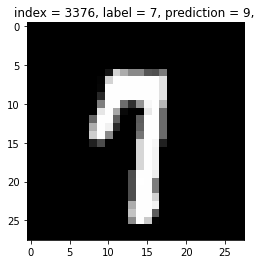

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

random_index = int(np.random.choice(len(index_label_prediction_list), 1))

index_str = 'index = ' + str(index_label_prediction_list[random_index][0]) + ', '
label_str = 'label = ' + str(index_label_prediction_list[random_index][1]) + ', '
prediction_str = 'prediction = ' + str(index_label_prediction_list[random_index][2]) + ', '

title_str = index_str + label_str + prediction_str

img = test_x_data[index_label_prediction_list[random_index][0]].reshape(28,28)

plt.title(title_str)
plt.imshow(img, cmap='gray')
plt.show()